In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data = pd.read_csv('weatherHistory.csv')

In [31]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [32]:
data.drop(['Formatted Date','Summary','Daily Summary','Loud Cover'],axis=1,inplace = True)

In [33]:
data['Precip Type'].replace({'rain':1,'snow':0}, inplace=True)

In [34]:
data.head()
data.dropna(inplace=True)

In [35]:
cols = list(data.columns)
cols

['Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [36]:
# data[cols].replace([np.inf, -np.inf], np.nan,inplace=True) 
# data[cols].isnull().values.any()
# data[cols].dropna(inplace=True)
# data[cols].isnull().values.any()
# cols.remove('Apparent Temperature (C)')
# data[cols]
# cols.remove('Temperature (C)')
# Y = data['Temperature (C)']
# data[cols].isnull().values.any()

# # X_train[np.isfinite(X_train) == True]
# def feature_normalize(X):
#     #Note here we need mean of indivdual column here, hence axis = 0
#     mu = np.mean(X, axis = 0)  
#     # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
#     sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
#     X_norm = (X - mu)/sigma
#     return X_norm, mu, sigma

# X, mu, sigma = feature_normalize(X)
# # X_train

# mu_testing = np.mean(X, axis = 0) # mean
# # mu_testing

# sigma_testing = np.std(X, axis = 0, ddof = 1) # mean
# # sigma_testing
# X

In [37]:
def normalize(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

data_n = normalize(data[cols])
data_n

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.354529,-0.257950,-0.324100,0.792744,0.478962,0.591154,1.309101,0.102151
1,0.354529,-0.270140,-0.339132,0.639467,0.499899,0.665652,1.309101,0.106414
2,0.354529,-0.267818,-0.138531,0.792744,-0.993615,0.153477,1.100800,0.109058
3,0.354529,-0.381592,-0.458870,0.486190,0.476635,0.758774,1.309101,0.113065
4,0.354529,-0.332831,-0.362458,0.486190,0.034630,0.665652,1.309101,0.113918
...,...,...,...,...,...,...,...,...
96448,0.354529,1.470711,1.413921,-1.557503,0.027651,-1.457543,1.374677,0.095585
96449,0.354529,1.320948,1.280187,-1.302042,-0.102624,-1.559978,1.243525,0.102407
96450,0.354529,1.055089,1.042784,-0.893303,-0.263142,-1.466855,1.374677,0.106670
96451,0.354529,1.001105,0.994577,-0.688934,-0.039813,-1.559978,1.374677,0.109143


In [38]:
X = data_n.drop(columns=['Temperature (C)'])
Y = data_n['Temperature (C)'].values
X,Y

(       Precip Type  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
 0         0.354529                 -0.324100  0.792744           0.478962   
 1         0.354529                 -0.339132  0.639467           0.499899   
 2         0.354529                 -0.138531  0.792744          -0.993615   
 3         0.354529                 -0.458870  0.486190           0.476635   
 4         0.354529                 -0.362458  0.486190           0.034630   
 ...            ...                       ...       ...                ...   
 96448     0.354529                  1.413921 -1.557503           0.027651   
 96449     0.354529                  1.280187 -1.302042          -0.102624   
 96450     0.354529                  1.042784 -0.893303          -0.263142   
 96451     0.354529                  0.994577 -0.688934          -0.039813   
 96452     0.354529                  0.893499 -0.637841          -0.712127   
 
        Wind Bearing (degrees)  Visibility (km)  Pressure (mil

In [39]:
X = np.hstack((np.ones((X.shape[0],1)), X))
X

array([[ 1.        ,  0.35452924, -0.32409998, ...,  0.59115351,
         1.30910067,  0.10215102],
       [ 1.        ,  0.35452924, -0.33913207, ...,  0.66565156,
         1.30910067,  0.10641443],
       [ 1.        ,  0.35452924, -0.13853141, ...,  0.15347742,
         1.10080026,  0.10905774],
       ...,
       [ 1.        ,  0.35452924,  1.04278354, ..., -1.46685531,
         1.37467673,  0.10667023],
       [ 1.        ,  0.35452924,  0.99457718, ..., -1.55997788,
         1.37467673,  0.10914301],
       [ 1.        ,  0.35452924,  0.89349933, ..., -1.383045  ,
         1.23580978,  0.11093364]])

In [107]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.6,random_state=214) 

In [41]:
# train_X = np.array(X_train)
# train_Y = np.array(y_train)
# test_X = np.array(X_test)
# test_Y = np.array(y_test)
# print(train_X.shape)
# print(train_Y.shape)
# print(test_X.shape)
# print(test_Y.shape)

In [86]:
train_X = np.array(X[:3000])
train_Y = np.array(Y[:3000])
test_X = np.array(X[3000:10000])
test_Y = np.array(Y[3000:10000])
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(3000, 8)
(3000,)
(7000, 8)
(7000,)


In [108]:
train_Y = train_Y.reshape(train_X.shape[0], 1)
test_Y = test_Y.reshape(test_Y.shape[0], 1)
m = train_X.shape[0]
n = train_X.shape[1]
print(n,m)

8 38374


In [109]:
from sklearn.linear_model import LinearRegression
h = LinearRegression()
h.fit(train_X,train_Y)
print(h.intercept_) # to retrieve theta_0
print(h.coef_) # to retrieve theta_1

[2.80986717e-05]
[[ 0.         -0.00233981  0.97825016 -0.02810751  0.05832989 -0.00404818
   0.00419381 -0.00218251]]


In [110]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
# X_final = np.hstack((np.ones((m,1)), X_train))
# y_final = np.array(y_train)
# X_train[np.isfinite(X_train) == True]
# print(X_final,y_final)
    # OR
    # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
    # If your confuse about this try to do this with few values for better understanding  
#     J = 1/(2 * m) * errors.T.dot(errors)

In [111]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [112]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta;

        cost_history[i] = compute_cost(X, y, theta) 
    return theta, cost_history

In [119]:
iterations = 1000;
alpha = 0.15;
theta, cost_history = gradient_descent(train_X, train_Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [[ 2.80986717e-05]
 [-2.33981033e-03]
 [ 9.78250158e-01]
 [-2.81075097e-02]
 [ 5.83298898e-02]
 [-4.04817799e-03]
 [ 4.19381283e-03]
 [-2.18250875e-03]]
First 5 values from cost_history = [0.26560712 0.15904094 0.1075278  0.08089642 0.0658072 ]
Last 5 values from cost_history = [0.00488757 0.00488757 0.00488757 0.00488757 0.00488757]


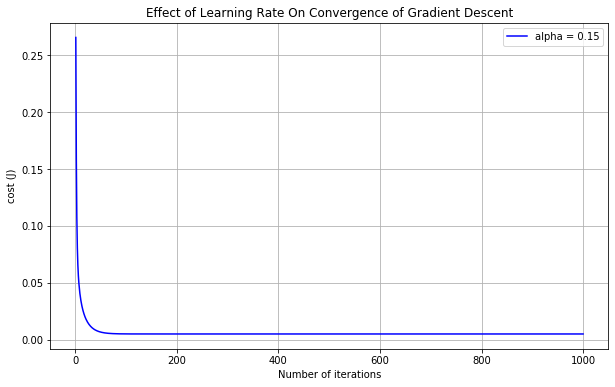

In [120]:
plt.plot(range(1, iterations +1), cost_history, color ='blue', label = 'alpha = 0.15')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

In [121]:
def testMultivariateLR(test_X, test_Y, theta):
    predicted_Y = test_X.dot(theta)

    result = np.sum(np.abs((predicted_Y - test_Y)/test_Y))
    result /= test_Y.shape[0]
    result *= 100
    accuracy = 100 - result

    return accuracy

accuracy = testMultivariateLR(test_X, test_Y, theta)
print("Accuracy =",accuracy)

Accuracy = 60.0928346070042


In [116]:
# line_X = test_X[:, 2:3]
# line_Y = test_Y[:,:]
# b0 = theta[0:1, :]
# b2 = theta[2:3, :]
# plt.scatter(x=line_X, y=line_Y, color='#1f77b4')
# plt.plot(line_X,b0+b2*line_X, 'r')
# plt.xlabel('Apparent Temperature (C)')
# plt.ylabel('Temprature (C)')

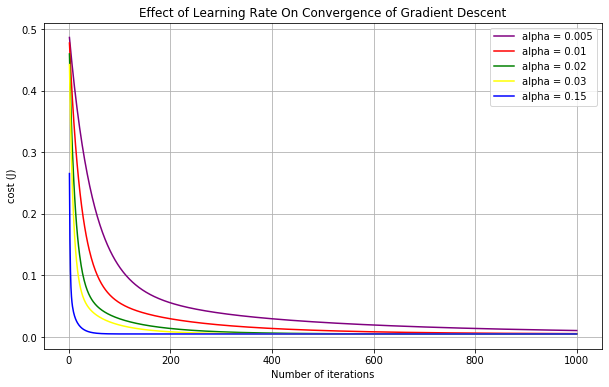

In [117]:
iterations = 1000
theta = np.zeros(theta.shape)

alpha = 0.005;
theta_1, cost_history_1 = gradient_descent(train_X, train_Y, theta, alpha, iterations)

alpha = 0.01;
theta_2, cost_history_2 = gradient_descent(train_X, train_Y, theta, alpha, iterations)

alpha = 0.02;
theta_3, cost_history_3 = gradient_descent(train_X, train_Y, theta, alpha, iterations)

alpha = 0.03;
theta_4, cost_history_4 = gradient_descent(train_X, train_Y, theta, alpha, iterations)

alpha = 0.15;
theta_5, cost_history_5 = gradient_descent(train_X, train_Y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.15')
# plt.rcParams["figure.figsize"] = (20,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()


In [75]:
# # X_test, mu, sigma = feature_normalize(X_test)
# plt.scatter(x=range(iterations), y=cost_history_1, color ='purple',label = 'alpha = 0.005')
# plt.scatter(x=range(iterations), y=cost_history_2, color ='red',label = 'alpha = 0.005')
# plt.scatter(x=range(iterations), y=cost_history_3, color ='purple',label = 'alpha = 0.005')
# plt.rcParams["figure.figsize"] = (11,6)
# plt.grid()
# plt.xlabel("Number of iterations")
# plt.ylabel("cost (J)")
# plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
# plt.legend()


In [117]:
# normalize_test_data = ((X_test - mu) / sigma)
# normalize_test_data = np.hstack((np.ones((len(y_test),1)), normalize_test_data))

# print(normalize_test_data.shape)
